In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv('out/DataTrain.csv')
test_data = pd.read_csv('out/DataTest.csv')

In [9]:
# label
# 0	DataTrain1.png	A7814

# split label menjadi 3 kolom sesuai dengan aturan plat nomor
# A7814 -> A 7814
# B3210DA -> B 3210 DA

def splitting_label(label):
    # pertama temukan index angka pertama dan terakhir yang muncul
    # misal A7814 -> 7, 4
    
    start = 0
    end = 0
    
    for i in range(len(label)):
        if label[i].isdigit():
            start = i
            break
    for i in range(len(label)-1, -1, -1):
        if label[i].isdigit():
            end = i
            break

    # kemudian split label menjadi 3 kolom
    # ketika index angka terakhir == index string terakhir, maka untuk kolom 3 diisi dengan np.nan

    first = label[:start]
    if end == len(label)-1:
        second = label[start:end+1]
        third = ''
    else:
        second = label[start:end+1]
        third = label[end+1:]

    return first, second, third

# split label menjadi 3 kolom
train_data['wilayah'], train_data['nopol'], train_data['kotanjenis'] = zip(*train_data['label'].map(splitting_label))

In [10]:
train_data.head(100)

,img,label,wilayah,nopol,kotanjenis
0,DataTrain2.png,B1074QO,B,1074,QO
1,DataTrain3.png,B1031QO,B,1031,QO
2,DataTrain4.png,B187EDA,B,187,EDA
3,DataTrain5.png,B1089VD,B,1089,VD
4,DataTrain6.png,B1972RBP,B,1972,RBP
...,...,...,...,...,...
95,DataTrain105.png,AA1856CJ,AA,1856,CJ
96,DataTrain106.png,AB3767XY,AB,3767,XY
97,DataTrain107.png,A1565DT,A,1565,DT
98,DataTrain108.png,AB2241VY,AB,2241,VY


<AxesSubplot: xlabel='wilayah', ylabel='count'>

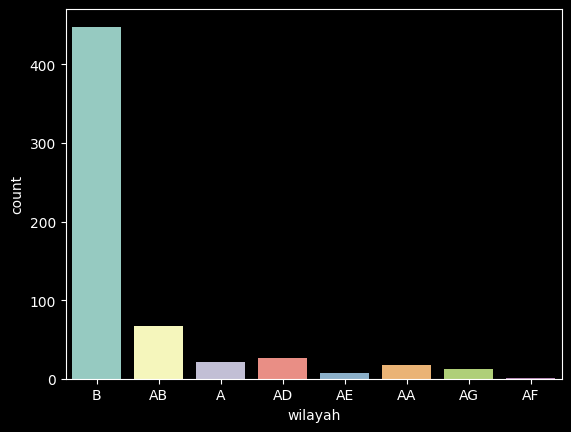

In [11]:
# visualisasikan standar distribusi dari kolom wilayah
sns.countplot(x='wilayah', data=train_data)

<AxesSubplot: xlabel='nopol', ylabel='count'>

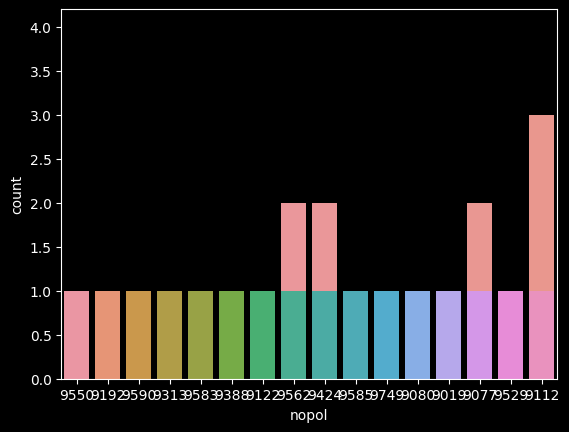

In [12]:
kendaraan_penumpang = 2999
motor = 6999
bus = 7999
penumpang_barang = 8999
truk = 9999

# visualisasikan standar distribusi dari kolom nopol berdasarkan jenisnya

# kendaraan penumpang
sns.countplot(x='nopol', data=train_data[train_data['nopol'].astype(int) <= kendaraan_penumpang])

# motor
sns.countplot(x='nopol', data=train_data[(train_data['nopol'].astype(int) > kendaraan_penumpang) & (train_data['nopol'].astype(int) <= motor)])

# bus
sns.countplot(x='nopol', data=train_data[(train_data['nopol'].astype(int) > motor) & (train_data['nopol'].astype(int) <= bus)])

# penumpang barang
sns.countplot(x='nopol', data=train_data[(train_data['nopol'].astype(int) > bus) & (train_data['nopol'].astype(int) <= penumpang_barang)])

# truk
sns.countplot(x='nopol', data=train_data[(train_data['nopol'].astype(int) > penumpang_barang) & (train_data['nopol'].astype(int) <= truk)])